## Image Denoising

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

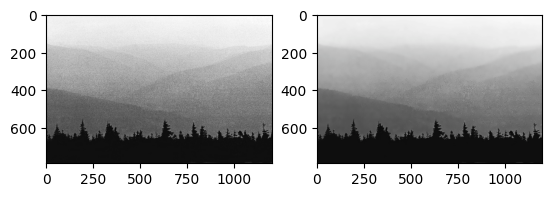

In [ ]:
img = cv.imread('../../img/noisy_img.jpg')

dst = cv.fastNlMeansDenoisingColored(img,None,10,10,7,21)
plt.subplot(121),plt.imshow(img)
plt.subplot(122),plt.imshow(dst)
plt.show()

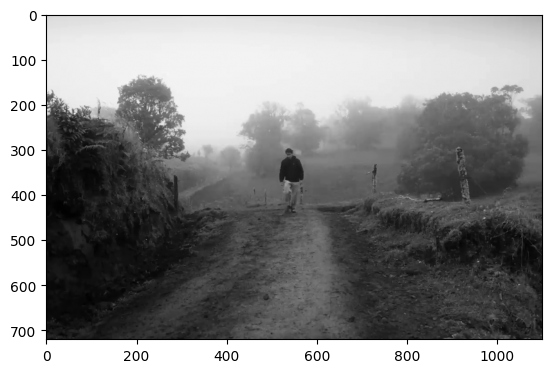

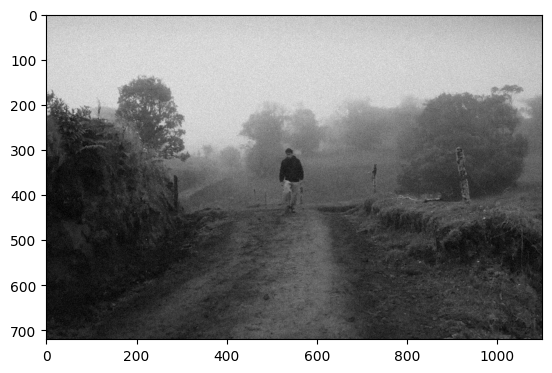

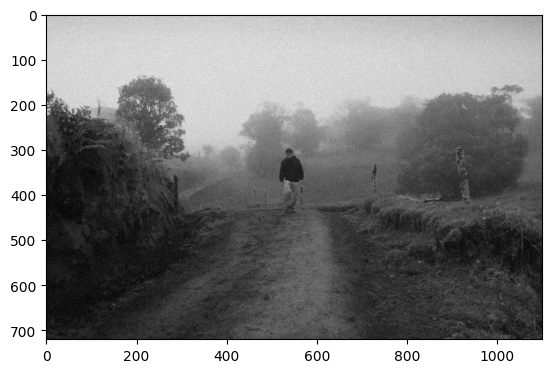

In [6]:
cap = cv.VideoCapture('../../videos/Green.mp4')
# create a list of first 5 frames
img = [cap.read()[1] for i in range(300)]
img = img[100:106]
# convert all to grayscale
gray = [cv.cvtColor(i, cv.COLOR_BGR2GRAY) for i in img]
# convert all to float64
gray = [np.float64(i) for i in gray]
# create a noise of variance 25
noise = np.random.randn(*gray[1].shape)*10
# Add this noise to images
noisy = [i+noise for i in gray]
# Convert back to uint8
noisy = [np.uint8(np.clip(i,0,255)) for i in noisy]
# Denoise 3rd frame considering all the 5 frames
dst = cv.fastNlMeansDenoisingMulti(noisy, 2, 5, None, 4, 7, 35)

plt.imshow(gray[2],'gray')
plt.show()
plt.imshow(noisy[2],'gray')
plt.show()
plt.imshow(dst,'gray')
plt.show()